# Subject 7: The SARS-CoV-2 (Covid-19) epidemic

The goal is to produce plots similar to the one of the South China Morning Post (SCMP), on The Coronavirus Pandemic page, which shows for different countries the cumulative number (i.e. the total number since the beginning of the pandemic) of people with coronavirus 2019 disease.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame 

The data we are going to use in a first step are compiled by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) and are freely available on GitHub.

In [2]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [3]:
# raw_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_data = pd.read_csv(data_url)
# show the raw_data

Firstly, download the data to make a graph showing the evolution of the cumulative number of cases over time for: Belgium, China (all provinces except Hong Kong), China, Hong-Kong, France except Dom/Tom, Germany, Iran, Italy, Japan, Korea South, Netherlands without the colonies, Portugal, Spain, United Kingdom without the colonies, US.

In [4]:
# download the data for different countries
data_Belgium = raw_data[raw_data["Country/Region"].str.contains('Belgium')]
data_Germany = raw_data[raw_data["Country/Region"].str.contains('Germany')]
data_Iran = raw_data[raw_data["Country/Region"].str.contains('Iran')]
data_Italy = raw_data[raw_data["Country/Region"].str.contains('Italy')]
data_Japan = raw_data[raw_data["Country/Region"].str.contains('Japan')]
data_KS = raw_data[raw_data["Country/Region"].str.contains('Korea')]
data_Portugal = raw_data[raw_data["Country/Region"].str.contains('Portugal')]
data_Spain = raw_data[raw_data["Country/Region"].str.contains('Spain')]
data_US = raw_data[raw_data["Country/Region"].str.contains('US')]

In [5]:
# deal with the data for China (all provinces except Hong Kong), China, Hong-Kong
data_China = raw_data[raw_data["Country/Region"].str.contains('China')]
data_HK = data_China[data_China["Province/State"].str.contains('Hong Kong')]
data_China_main = data_China.drop(index = data_HK.index)

#data_China.loc['CS'] = data_China.apply(lambda x:x.sum(),axis=0)
#a = data_China.loc[data_China.index[-1],:] #select the last column
#calcluate the total number of cases in China
data_China = data_China.apply(lambda x:x.sum(),axis=0)
data_China['Province/State'] = data_China['Province/State'].replace('AnhuiBeijingChongqingFujianGansuGuangdongGuangxiGuizhouHainanHebeiHeilongjiangHenanHong KongHubeiHunanInner MongoliaJiangsuJiangxiJilinLiaoningMacauNingxiaQinghaiShaanxiShandongShanghaiShanxiSichuanTianjinTibetXinjiangYunnanZhejiang','China')
data_China['Country/Region'] = data_China['Country/Region'].replace('ChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChina','China')
#data_China_TC = data_China[data_China.index[-1]]
data1 = data_China.reset_index()
#data1.set_index('index',inplace=True)
data2 = data1.T
data2.columns = data2.iloc[0,:]
#data2.columns = data2.loc['index',:]
data2.columns.name= None
data2 = data2.drop('index')
#print(data2)
#print(data2[1:])
data_China = data2

data_China_main = data_China_main.apply(lambda x:x.sum(),axis=0)
data_China_main['Province/State'] = data_China_main['Province/State'].replace('AnhuiBeijingChongqingFujianGansuGuangdongGuangxiGuizhouHainanHebeiHeilongjiangHenanHubeiHunanInner MongoliaJiangsuJiangxiJilinLiaoningMacauNingxiaQinghaiShaanxiShandongShanghaiShanxiSichuanTianjinTibetXinjiangYunnanZhejiang','Mainland')
data_China_main['Country/Region'] = data_China_main['Country/Region'].replace('ChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChina','China(all provinces except Hong Kong)')
#data_China__main_TC = data_China_main[data_China_main.index[-1]]
#print(data_China__main_TC)
data3 = data_China_main.reset_index()
#data1.set_index('index',inplace=True)
data4 = data3.T
data4.columns = data4.iloc[0,:]
#data2.columns = data2.loc['index',:]
data4.columns.name= None
data4 = data4.drop('index')
#print(data2)
#print(data2[1:])
data_China_main = data4

data_HK['Country/Region'] = data_HK['Country/Region'].replace('China','Hong Kong China')
#data_HK

In [6]:
#France except except Dom/Tom
data_France = raw_data[raw_data["Country/Region"].str.contains('France')]
#data_France
data_France_main = data_France[data_France.isnull().any(axis=1)]
#data_France_main

In [7]:
#Netherlands without the colonies
data_Netherlands = raw_data[raw_data["Country/Region"].str.contains('Netherlands')]
#data_Netherlands
data_Netherlands_main = data_Netherlands[data_Netherlands.isnull().any(axis=1)]
#data_Netherlands_main

In [8]:
#United Kingdom without the colonies
data_UK = raw_data[raw_data["Country/Region"].str.contains('United Kingdom')]
#data_UK
data_UK_main = data_UK[data_UK.isnull().any(axis=1)]
#data_UK_main


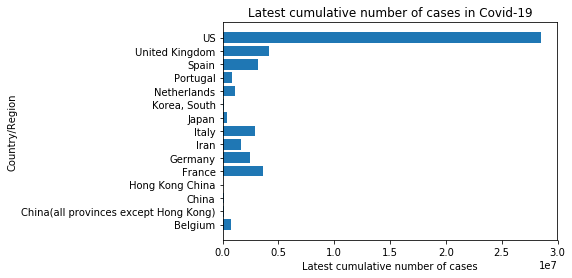

In [9]:
frames = [data_Belgium,data_China_main,data_China,data_HK,data_France_main,data_Germany,data_Iran,data_Italy,data_Japan,data_KS,
         data_Netherlands_main,data_Portugal,data_Spain,data_UK_main,data_US]
result = pd.concat(frames)
#result
Name = result["Country/Region"]
Cases = result[result.columns[-1]] #choose the latest results
#Cases

plt.barh(Name,Cases)
plt.title('Latest cumulative number of cases in Covid-19')
plt.ylabel('Country/Region')
plt.xlabel('Latest cumulative number of cases')
plt.show()

Next, make a graph with the date on the x-axis and the cumulative number of cases at this date on the y-axis for different countries or regions.The suggestion is to make two versions of this graph, one with a linear scale and another with a logarithmic scale.

In [10]:
d = data_Belgium.size # follow the time
#df_Belgium = data_Belgium.iloc[:,4:d]
#print(data_Belgium.iloc[:,4:405])
#df_list = df.values.tolist()
#print(df_list)
#fig = plt.figure(figsize=(20,10))
#plot linear scale
#ax = plt.subplot(1,2,1)
#plt.xticks(())
#ax.plot(df_Belgium.columns.values,df_Belgium.T,'o-')
#ax.set_title('The cumulative number of cases in Belgium(linear scale)')
#ax.set_xlabel('date')
#ax.set_ylabel('the cumulative number of cases')
#plt.legend('cases')
#plt.subplots_adjust(bottom=0.15)
#plot logarithmic scale
#ay = plt.subplot(1,2,2)
#plt.xticks(())
#ay.plot(df_Belgium.columns.values,df_Belgium.T,'o-')
#ay.set_title('The cumulative number of cases in Belgium(logarithmic scale)')
#ay.set_xlabel('date')
#ay.set_ylabel('the cumulative number of cases')
#plt.yscale("log")
#plt.show()

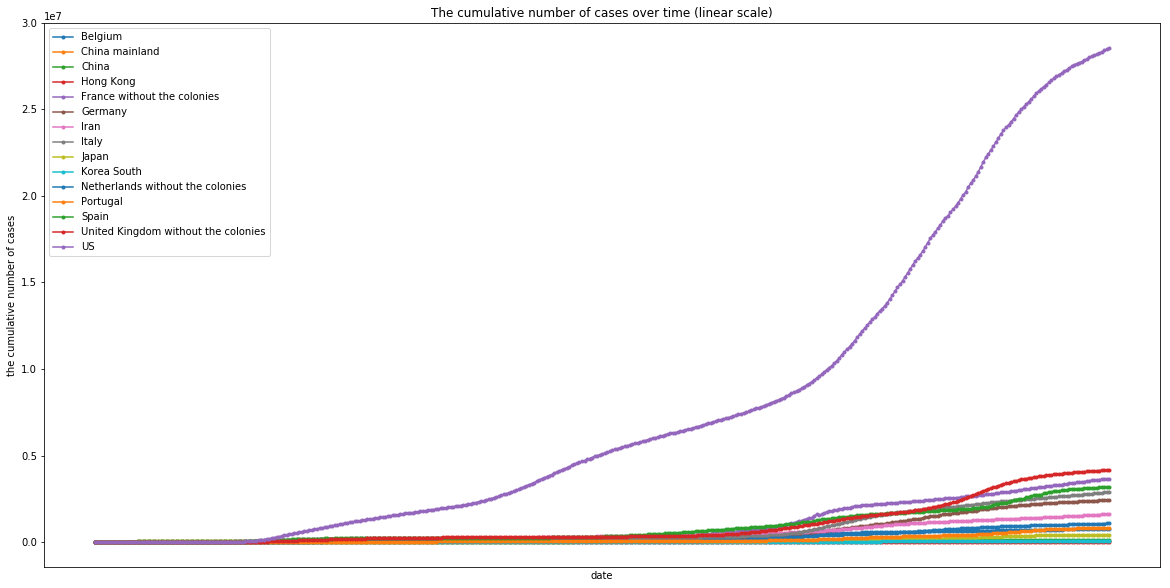

In [11]:
d = data_Belgium.size # follow the time
df = raw_data.iloc[:,4:d]
df_Belgium = data_Belgium.iloc[:,4:d]
df_China_main = data_China_main.iloc[:,4:d]
df_China = data_China.iloc[:,4:d]
df_HK = data_HK.iloc[:,4:d]
df_France_main = data_France_main.iloc[:,4:d]
df_Germany = data_Germany.iloc[:,4:d]
df_Iran = data_Iran.iloc[:,4:d]
df_Italy = data_Italy.iloc[:,4:d]
df_Japan = data_Japan.iloc[:,4:d]
df_KS = data_KS.iloc[:,4:d]
df_Netherlands_main = data_Netherlands_main.iloc[:,4:d]
df_Portugal = data_Portugal.iloc[:,4:d]
df_Spain = data_Spain.iloc[:,4:d]
df_UK_main = data_UK_main.iloc[:,4:d]
df_US = data_US.iloc[:,4:d]
fig = plt.figure(figsize=(20,10))
#plot linear scale
#ax = plt.subplot(1,2,1)
plt.xticks(())
plt.plot(df.columns.values,df_Belgium.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_China_main.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_China.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_HK.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_France_main.T, marker='o', markersize=3)
plt.plot(df.columns.values,df_Germany.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_Iran.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_Italy.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_Japan.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_KS.T, marker='o', markersize=3)
plt.plot(df.columns.values,df_Netherlands_main.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_Portugal.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_Spain.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_UK_main.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_US.T, marker='o', markersize=3)
plt.xlabel('date')
plt.ylabel('the cumulative number of cases')
plt.title('The cumulative number of cases over time (linear scale)')
plt.legend(['Belgium','China mainland','China','Hong Kong','France without the colonies',
            'Germany','Iran','Italy', 'Japan', 'Korea South', 'Netherlands without the colonies', 
            'Portugal', 'Spain','United Kingdom without the colonies','US'])
plt.show()

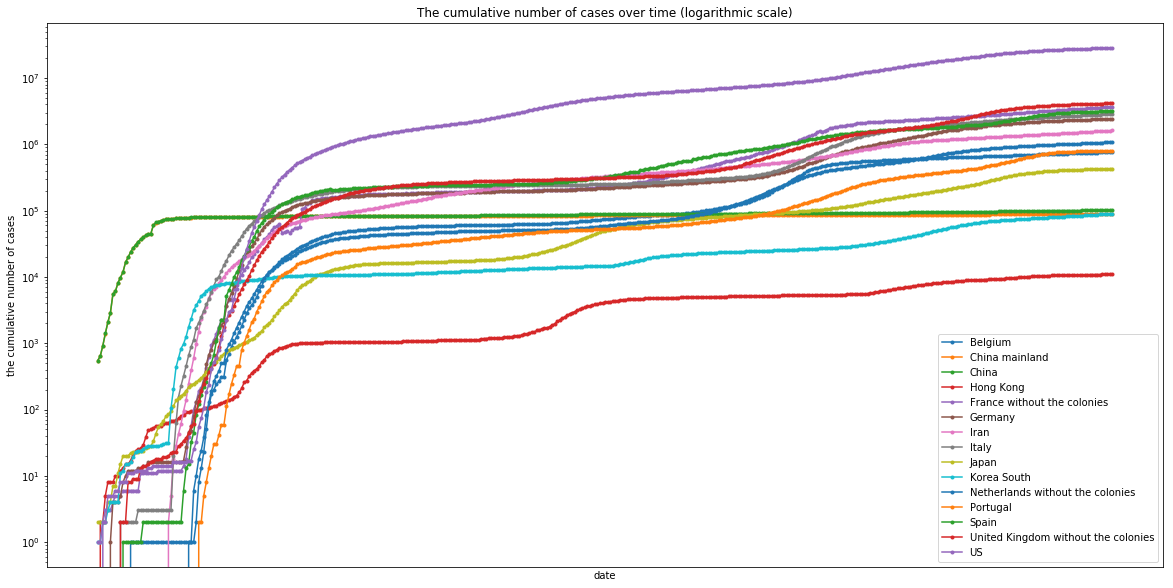

In [12]:
fig = plt.figure(figsize=(20,10))
#plot linear scale
#ax = plt.subplot(1,2,1)
plt.xticks(())
plt.plot(df.columns.values,df_Belgium.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_China_main.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_China.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_HK.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_France_main.T, marker='o', markersize=3)
plt.plot(df.columns.values,df_Germany.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_Iran.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_Italy.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_Japan.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_KS.T, marker='o', markersize=3)
plt.plot(df.columns.values,df_Netherlands_main.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_Portugal.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_Spain.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_UK_main.T, marker='o', markersize=3)
plt.plot(df.columns.values, df_US.T, marker='o', markersize=3)
plt.xlabel('date')
plt.ylabel('the cumulative number of cases')
plt.title('The cumulative number of cases over time (logarithmic scale)')
plt.legend(['Belgium','China mainland','China','Hong Kong','France without the colonies',
            'Germany','Iran','Italy', 'Japan', 'Korea South', 'Netherlands without the colonies', 
            'Portugal', 'Spain','United Kingdom without the colonies','US'])
plt.yscale("log")
plt.show()

# Another question to work on when this “mess” is over.

The death datas(timeseriescovid19deathsglobal.csv) are used to do the same graphs as above.

In [13]:
death_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [14]:
# death_data in different countries
death_data = pd.read_csv(death_url)

In [15]:
# download the data for different countries
death_Belgium = death_data[death_data["Country/Region"].str.contains('Belgium')]
death_Germany = death_data[death_data["Country/Region"].str.contains('Germany')]
death_Iran = death_data[death_data["Country/Region"].str.contains('Iran')]
death_Italy = death_data[death_data["Country/Region"].str.contains('Italy')]
death_Japan = death_data[death_data["Country/Region"].str.contains('Japan')]
death_KS = death_data[death_data["Country/Region"].str.contains('Korea')]
death_Portugal = death_data[death_data["Country/Region"].str.contains('Portugal')]
death_Spain = death_data[death_data["Country/Region"].str.contains('Spain')]
death_US = death_data[death_data["Country/Region"].str.contains('US')]

In [16]:
death_China = death_data[death_data["Country/Region"].str.contains('China')]
death_HK = death_China[death_China["Province/State"].str.contains('Hong Kong')]
death_China_main = death_China.drop(index = death_HK.index)

death_China = death_China.apply(lambda x:x.sum(),axis=0)
death_China['Province/State'] = death_China['Province/State'].replace('AnhuiBeijingChongqingFujianGansuGuangdongGuangxiGuizhouHainanHebeiHeilongjiangHenanHong KongHubeiHunanInner MongoliaJiangsuJiangxiJilinLiaoningMacauNingxiaQinghaiShaanxiShandongShanghaiShanxiSichuanTianjinTibetXinjiangYunnanZhejiang','China')
death_China['Country/Region'] = death_China['Country/Region'].replace('ChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChina','China')
#data_China_TC = data_China[data_China.index[-1]]
death1 = death_China.reset_index()
#data1.set_index('index',inplace=True)
death2 = death1.T
death2.columns = death2.iloc[0,:]
#data2.columns = data2.loc['index',:]
death2.columns.name= None
death2 = death2.drop('index')
#print(data2)
#print(data2[1:])
death_China = death2

death_China_main = death_China_main.apply(lambda x:x.sum(),axis=0)
death_China_main['Province/State'] = death_China_main['Province/State'].replace('AnhuiBeijingChongqingFujianGansuGuangdongGuangxiGuizhouHainanHebeiHeilongjiangHenanHubeiHunanInner MongoliaJiangsuJiangxiJilinLiaoningMacauNingxiaQinghaiShaanxiShandongShanghaiShanxiSichuanTianjinTibetXinjiangYunnanZhejiang','Mainland')
death_China_main['Country/Region'] = death_China_main['Country/Region'].replace('ChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChina','China(all provinces except Hong Kong)')
#data_China__main_TC = data_China_main[data_China_main.index[-1]]
#print(data_China__main_TC)
death3 = death_China_main.reset_index()
#data1.set_index('index',inplace=True)
death4 = death3.T
death4.columns = death4.iloc[0,:]
#data2.columns = data2.loc['index',:]
death4.columns.name= None
death4 = death4.drop('index')
#print(data2)
#print(data2[1:])
death_China_main = death4

death_HK['Country/Region'] = death_HK['Country/Region'].replace('China','Hong Kong China')
#data_HK
#frames = [data_HK,data_China_main,data_China]
#result = pd.concat(frames)
#result

In [17]:
#France except except Dom/Tom
death_France = death_data[death_data["Country/Region"].str.contains('France')]
#data_France
death_France_main = death_France[death_France.isnull().any(axis=1)]
#data_France_main
#Netherlands without the colonies
death_Netherlands = death_data[death_data["Country/Region"].str.contains('Netherlands')]
#data_Netherlands
death_Netherlands_main = death_Netherlands[death_Netherlands.isnull().any(axis=1)]
#data_Netherlands_main
#United Kingdom without the colonies
death_UK = death_data[death_data["Country/Region"].str.contains('United Kingdom')]
#data_UK
death_UK_main = death_UK[death_UK.isnull().any(axis=1)]
#data_UK_main

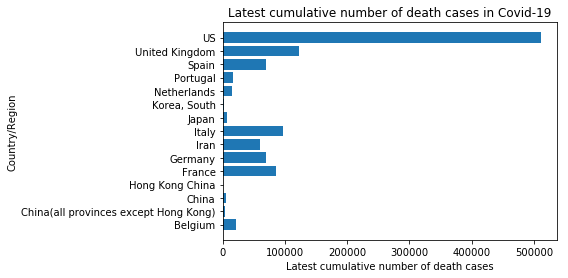

In [18]:
#Latest cumulative number of death cases in Covid-19
death_frames = [death_Belgium,death_China_main,death_China,death_HK,death_France_main,death_Germany,death_Iran,
                death_Italy,death_Japan,death_KS,death_Netherlands_main,death_Portugal,death_Spain,death_UK_main,
                death_US]
death_result = pd.concat(death_frames)
#result
death_Name = death_result["Country/Region"]
death_Cases = death_result[death_result.columns[-1]] #choose the latest results
#Cases

plt.barh(death_Name,death_Cases)
plt.title('Latest cumulative number of death cases in Covid-19')
plt.ylabel('Country/Region')
plt.xlabel('Latest cumulative number of death cases')
plt.show()

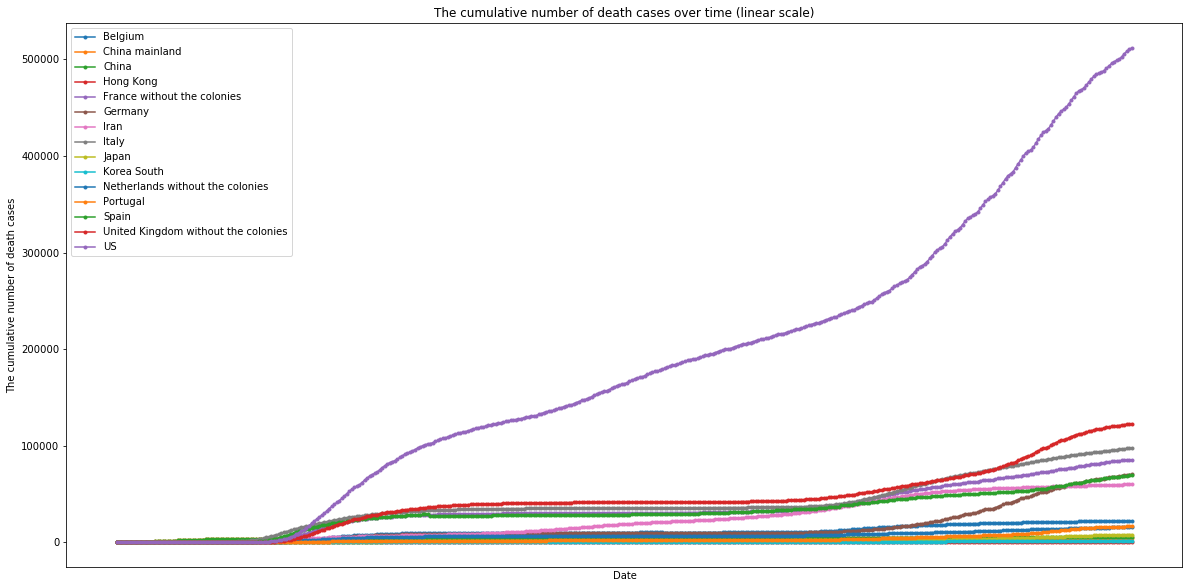

In [19]:
#The cumulative number of death cases over time (linear scale)
death = death_Belgium.size # follow the time
death = death_data.iloc[:,4:d]
d_Belgium = death_Belgium.iloc[:,4:d]
d_China_main = death_China_main.iloc[:,4:d]
d_China = death_China.iloc[:,4:d]
d_HK = death_HK.iloc[:,4:d]
d_France_main = death_France_main.iloc[:,4:d]
d_Germany = death_Germany.iloc[:,4:d]
d_Iran = death_Iran.iloc[:,4:d]
d_Italy = death_Italy.iloc[:,4:d]
d_Japan = death_Japan.iloc[:,4:d]
d_KS = death_KS.iloc[:,4:d]
d_Netherlands_main = death_Netherlands_main.iloc[:,4:d]
d_Portugal = death_Portugal.iloc[:,4:d]
d_Spain = death_Spain.iloc[:,4:d]
d_UK_main = death_UK_main.iloc[:,4:d]
d_US = death_US.iloc[:,4:d]
fig = plt.figure(figsize=(20,10))
#plot linear scale
#ax = plt.subplot(1,2,1)
plt.xticks(())
plt.plot(death.columns.values,d_Belgium.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_China_main.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_China.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_HK.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_France_main.T, marker='o', markersize=3)
plt.plot(death.columns.values,d_Germany.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_Iran.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_Italy.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_Japan.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_KS.T, marker='o', markersize=3)
plt.plot(death.columns.values,d_Netherlands_main.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_Portugal.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_Spain.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_UK_main.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_US.T, marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('The cumulative number of death cases')
plt.title('The cumulative number of death cases over time (linear scale)')
plt.legend(['Belgium','China mainland','China','Hong Kong','France without the colonies',
            'Germany','Iran','Italy', 'Japan', 'Korea South', 'Netherlands without the colonies', 
            'Portugal', 'Spain','United Kingdom without the colonies','US'])
plt.show()

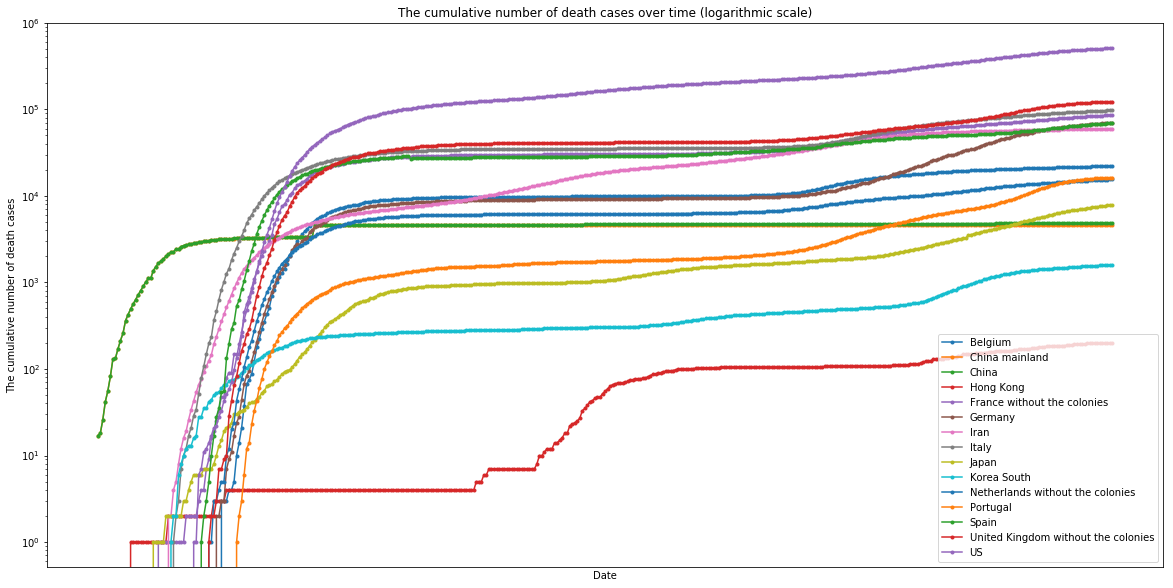

In [20]:
#The cumulative number of death cases over time (logarithmic scale)
fig = plt.figure(figsize=(20,10))
#plot linear scale
#ax = plt.subplot(1,2,1)
plt.xticks(())
plt.plot(death.columns.values,d_Belgium.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_China_main.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_China.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_HK.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_France_main.T, marker='o', markersize=3)
plt.plot(death.columns.values,d_Germany.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_Iran.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_Italy.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_Japan.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_KS.T, marker='o', markersize=3)
plt.plot(death.columns.values,d_Netherlands_main.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_Portugal.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_Spain.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_UK_main.T, marker='o', markersize=3)
plt.plot(death.columns.values, d_US.T, marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('The cumulative number of death cases')
plt.title('The cumulative number of death cases over time (logarithmic scale)')
plt.legend(['Belgium','China mainland','China','Hong Kong','France without the colonies',
            'Germany','Iran','Italy', 'Japan', 'Korea South', 'Netherlands without the colonies', 
            'Portugal', 'Spain','United Kingdom without the colonies','US'])
plt.yscale("log")
plt.show()

To attenuate the effects of counting procedures,once the pandemic is over, take the total number of deaths and normalize per 1000 inhabitants of France. 

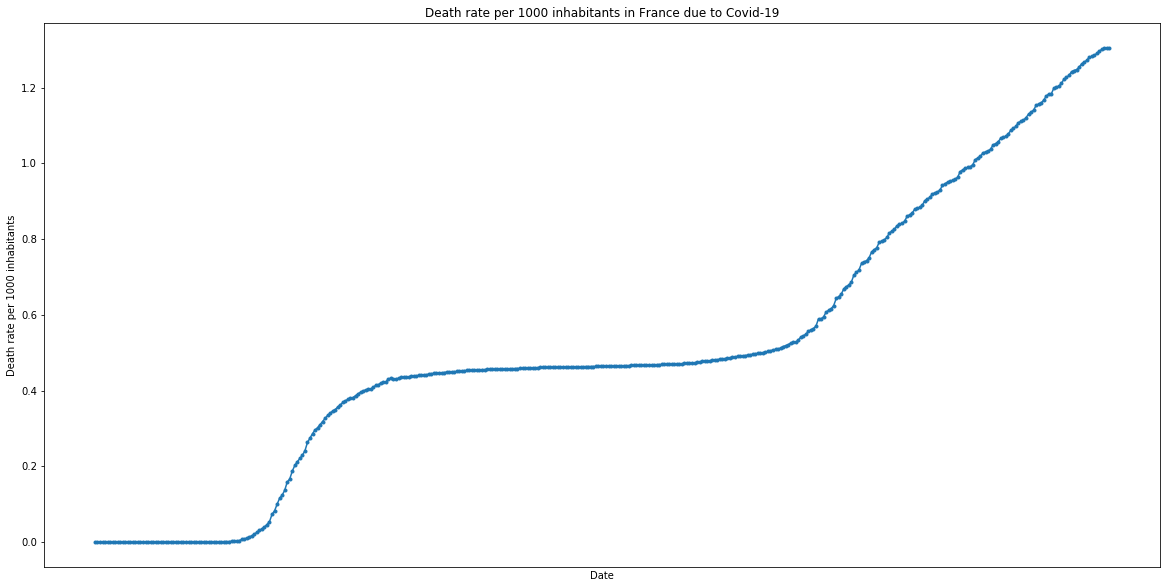

In [21]:
# Death Rate =Number of Deaths /Annual Average Number of Population ×1000‰
# 2021 population metropolitan France:65 249 843
# 2020 population metropolitan France:65 123 843
# data comes from: 'https://www.insee.fr/en/statistiques/5015919?sommaire=5015923#titre-bloc-3'

#select the index between 2020 and 2021
t = death_France_main.columns.get_loc("12/31/20")

Tp_20 = 65123843
Tp_21 = 65249843
# take the total number of deaths and normalize per 1000 inhabitants of France
R_Death_20 = death_France_main.iloc[:,4:t]/Tp_20*1000
#print(R_Death_2020)
R_Death_21 = death_France_main.iloc[:,t+1:d]/Tp_21*1000
#print(R_Death_2021)
Rate_Death_France = pd.concat([R_Death_20,R_Death_21], axis=1)
#Rate_Death_France
fig = plt.figure(figsize=(20,10))
#plot linear scale
#ax = plt.subplot(1,2,1)
plt.xticks(())
plt.plot(Rate_Death_France.columns.values,Rate_Death_France.T, marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('Death rate per 1000 inhabitants')
plt.title('Death rate per 1000 inhabitants in France due to Covid-19')
plt.show()